# Visualizing tweets

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from bs4 import BeautifulSoup
import re
import string
import spacy
import gensim
from textblob import TextBlob

In [ ]:
nlp = spacy.load('en')

In [3]:
with open("tweets_ww_6-5.txt", "r") as f:
    t_list =[]
    for line in f:
        tweet = json.loads(line)
        t_list.append(tweet)
        
with open("tweets.txt", "r") as f:
    t_list1 =[]
    for line in f:
        tweet = json.loads(line)
        t_list1.append(tweet)        

In [4]:
ww = pd.DataFrame(t_list)
ww1 = pd.DataFrame(t_list1)

ww_df = pd.concat([ww, ww1])
ww_df = ww_df.reset_index()

In [5]:
print(ww_df.shape)
ww_df[['favorite_count', 'filter_level', 'text', 'in_reply_to_user_id', 'source']].head()

(1501, 33)


,favorite_count,filter_level,text,in_reply_to_user_id,source
0,0,low,So… Can We Talk About That ‘Wonder Woman’ Fina...,None,"<a href=""https://dlvrit.com/"" rel=""nofollow"">d..."
1,0,low,So… Can We Talk About That ‘Wonder Woman’ Fina...,None,"<a href=""https://dlvrit.com/"" rel=""nofollow"">d..."
2,0,low,Fashion brands celebrate Wonder Woman - Fashio...,None,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT..."
3,0,low,So… Can We Talk About That ‘Wonder Woman’ Fina...,None,"<a href=""https://dlvrit.com/"" rel=""nofollow"">d..."
4,0,low,Motivation Monday! Like millions I saw Wonder ...,None,"<a href=""http://instagram.com"" rel=""nofollow"">..."


In [6]:
spacy.en.STOP_WORDS.update(["want", "film", "bullet","vs", "physics", "bracelet", "diana", "youtube", "box", "office", "get", "gal", "gadot", "one", "dc", "superhero", "wonder", "woman", "movie", "go", "see", "wonderwoman", "watch", "watching"])
stops = spacy.en.STOP_WORDS

In [7]:
def clean_text(text):
    
    # remove HTML
    text = BeautifulSoup(text, "html.parser").get_text()
    
    #removes url
    text = re.sub('https?:\/\/.*[\r\n]*', ' ', text, flags=re.MULTILINE)
       
    # removes numbers, symbols, nextline symbols 
    text = re.sub("[^a-zA-Z' ]"," ", text)   
    text = text.replace("\n", '').replace('  ', ' ').lower().strip('.')
    
    # removes some possessive, needs improvement
    text = re.sub("'s", "", text)
    text = nlp(text)
    
    # removes punctuation and pronouns, returns lemmatized word
    words=[]
    for word in text:
        if word.pos_ != 'PUNCT' and word.lemma_ != '-PRON-' and not word.is_space:
            words.append(word.lemma_)
    
    # removes stop words
    unigrams=[]
    for word in words:
        if word not in spacy.en.STOP_WORDS:
            unigrams.append(word)
            
    unigrams = [word for word in unigrams if word not in ['t', 's', "v", "'s" "n't"]]
    
    return unigrams

In [35]:
pd.set_option('display.width', 2000)
pd.set_option('display.max_columns', 500)

for i, item in enumerate(ww_df['text'].str.findall('.*Physics.*')):
    if item != []:
        print(i,item)


869 ["The Physics of Bullets Vs. Wonder Woman's Bracelets - WIRED https://t.co/KQOlZKl5P7"]
933 ['The Physics of Bullets Vs. Wonder Woman’s Bracelets https://t.co/ZP6vWuXTsR https://t.co/iUIWI5HLwR']
935 ['The Physics of Bullets Vs. Wonder Woman’s Bracelets https://t.co/yV5tW4Oh7I https://t.co/mMyBP60IKd']
936 ['The Physics of Bullets Vs. Wonder Woman’s Bracelets https://t.co/OfSiBincbn https://t.co/Kof8Yelhjx']
937 ['https://t.co/1auRDGl1Nm The Physics of Bullets Vs. Wonder Woman’s Bracelets https://t.co/XSxxaXQByN https://t.co/IT2XBQ1X7Q']
941 ['The Physics of Bullets Vs. Wonder Woman’s Bracelets https://t.co/FbeAn2h9Ji https://t.co/4AoG0oEDnw']
942 ['The Physics of Bullets Vs. Wonder Woman’s Bracelets https://t.co/qM81jxNGPX https://t.co/0BNmBrX4cR']
1008 ['The Physics of Bullets Vs. Wonder Woman’s Bracelets https://t.co/8LHnAoJyFE']
1037 ['The Physics of Bullets Vs. Wonder Woman’s Bracelets https://t.co/YGnF4TIRjs https://t.co/lucmmI3bl9']
1038 ['The Physics of Bullets Vs. Wonder W

Retweets are filtered out from the original streamfilter, but some popular topics are tweeted independently by many people as was the case for this article. Depending on the application some tweets may need to be filtered further.

In [10]:
tweet_list = ww_df['text'].apply(clean_text)

In [11]:
clean_text(ww_df['text'][17])

['fantastic', 'scene', 'nearly']

## Phrase modeling 

In [12]:

bigrams = gensim.models.phrases.Phraser(gensim.models.Phrases(tweet_list))
bigram_phrases = [bigrams[tweet] for tweet in tweet_list]
trigrams = gensim.models.phrases.Phraser(gensim.models.Phrases(bigram_phrases))
trigram_phrases = [trigrams[tweet] for tweet in bigram_phrases]




In [13]:
test = clean_text(ww_df['text'][17])

test
    

['fantastic', 'scene', 'nearly']

In [14]:
[word for word in test if word not in "n't"]

['fantastic', 'scene', 'nearly']

In [15]:
from collections import Counter

Counter([word for line in trigram_phrases for word in line]).most_common(20)

[('good', 80),
 ('like', 50),
 ('new', 41),
 ('love', 37),
 ('review', 36),
 ('great', 31),
 ('think', 31),
 ('today', 30),
 ('time', 30),
 ('man', 25),
 ('sequel_bring_america', 25),
 ('ne', 23),
 ('amazing', 23),
 ('thing', 23),
 ('win', 23),
 ('female', 23),
 ('record', 23),
 ('weekend', 22),
 ('night', 21),
 ('fantastic_scene_nearly', 21)]

In [16]:
tweet_words = [word for tweet in bigram_phrases for word in tweet]

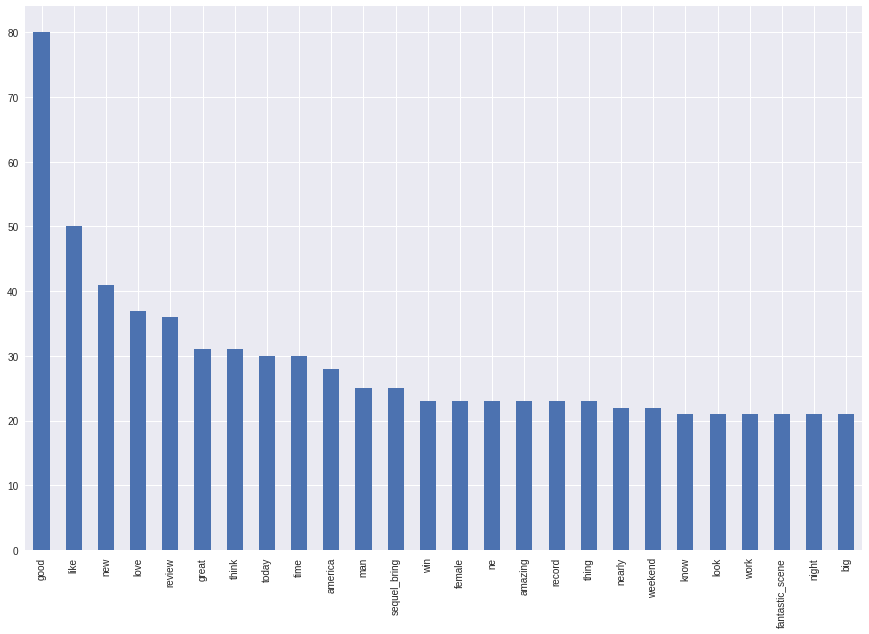

In [17]:
tweet_words = pd.Series(tweet_words)
tweet_words.value_counts()[tweet_words.value_counts() > 20].plot(kind = 'bar', figsize = (15, 10))
plt.show()


In [18]:
text = ""
for word in tweet_words:
    text = text + " " + word

In [19]:
def sentiment(question):
    
    pol_sub = [TextBlob(question).sentiment.polarity, 
               TextBlob(question).sentiment.subjectivity]
    return pol_sub           

def unsplit(words):
    
    sent = str('')
    for word in words:
        if len(sent)==0:
            sent = word
        else:    
            sent = sent + ' ' + word
    return sent    

In [20]:
tweet_list[7]

tweet_sentiment = tweet_list.apply(lambda x: sentiment(unsplit(x)))
print(tweet_sentiment[0:10])
tweet_list[0:10]

0       [0.0, 0.0]
1       [0.0, 0.0]
2       [0.0, 0.0]
3       [0.0, 0.0]
4       [1.0, 1.0]
5       [0.0, 1.0]
6      [-1.0, 1.0]
7       [0.0, 0.0]
8    [-0.625, 1.0]
9       [0.0, 0.0]
Name: text, dtype: object


0                                       [talk, finale]
1                                       [talk, finale]
2      [fashion, brand, celebrate, fashionunit, india]
3                                       [talk, finale]
4    [motivation, monday, like, million, weekend, i...
5                                              [giant]
6    [ain, docilely, sammich, yeah, cuz, evil, geni...
7                                    [ne, immediately]
8                   [imagine, mad, thor, loki, marvel]
9                                            [weekend]
Name: text, dtype: object

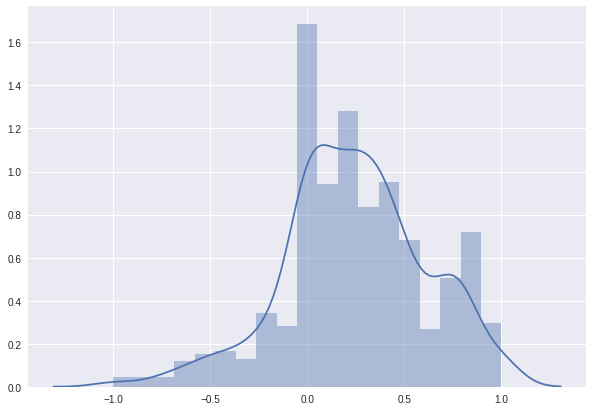

In [21]:
polarities = [pol[0] for pol in tweet_sentiment if pol[1] != 0]
plt.figure(figsize = (10,7))
sns.distplot(polarities)

plt.show()

In [22]:
print("mean:",np.mean(polarities))
print('{:<0} {}'.format("median:",np.median(polarities)))
print("99th percentile:" + " " + str(np.percentile(polarities, 99)))
print('{:<4} {}'.format("std:", np.std(polarities)))

mean: 0.243512476424
median: 0.25
99th percentile: 1.0
std: 0.3671882750625844


## Hypothesis testing

In [34]:
# draw samples and calculate test statistic for boostrap testing, with replacement by default

def draw_sample(array, size = 1000):
    idx = np.random.choice(len(array), size)
    return [array[i] for i in idx]

def calc_stat(array, num_samples, func):
    sample_list = []
    for num in np.arange(num_samples):
        sample_list.append(func(draw_sample(array)))
    return sample_list


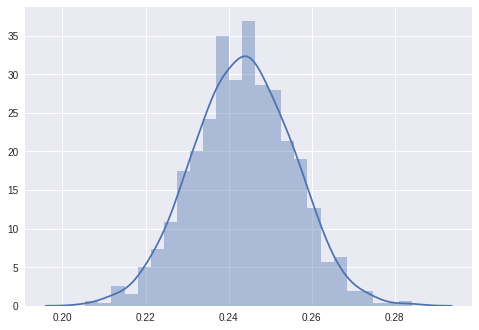

0.011936881577
0.0116115127931


1.0

In [24]:
# test for how significant .241 is in sentiment value

#draw_sample(polarities)
pol_means = calc_stat(polarities, 1000, np.mean)
sns.distplot(pol_means)
plt.show()
print(np.std(pol_means))
print(np.std(polarities)/(1000**.5))

# prob the mean sentiment is greater than 0

np.sum(np.array(pol_means) > 0)/len(pol_means)


The entire bootstrapped sample is greater than 0, it's unlikely that the population sentiment is 0. A larger tweet size should be considered before acting on inference though. 

In [25]:
# ratio of positive to negative tweets

np.sum(pd.Series(polarities) > 0) / np.sum(pd.Series(polarities) < 0)

4.6504065040650406

Another way to get a sense of the tweet sentiment, roughly 4.65 times the number of positive to negative tweets the weekend after the movie. 

# POS tagging with spacy

In [26]:
parsed = nlp(ww_df['text'][10])
print(parsed)
print(parsed[2].lower_)
print(parsed[2].tag_)

Wonder Woman Sequel Will Bring Diana To America... https://t.co/s7gpbu3Ogk
sequel
NNP


In [27]:
def get_adj(text):
    a = []
    for word in nlp(text):
        if word.pos_ == "ADJ":
            a.append(word.lower_)
    return a        

In [28]:
bigram_sents = [' '.join(line) for line in tweet_list]
adj_list = [get_adj(sent) for sent in bigram_sents]

In [29]:
adj_words = [word for sent in adj_list for word in sent]
adj_words = [word for word in adj_words if not word in STOPWORDS]

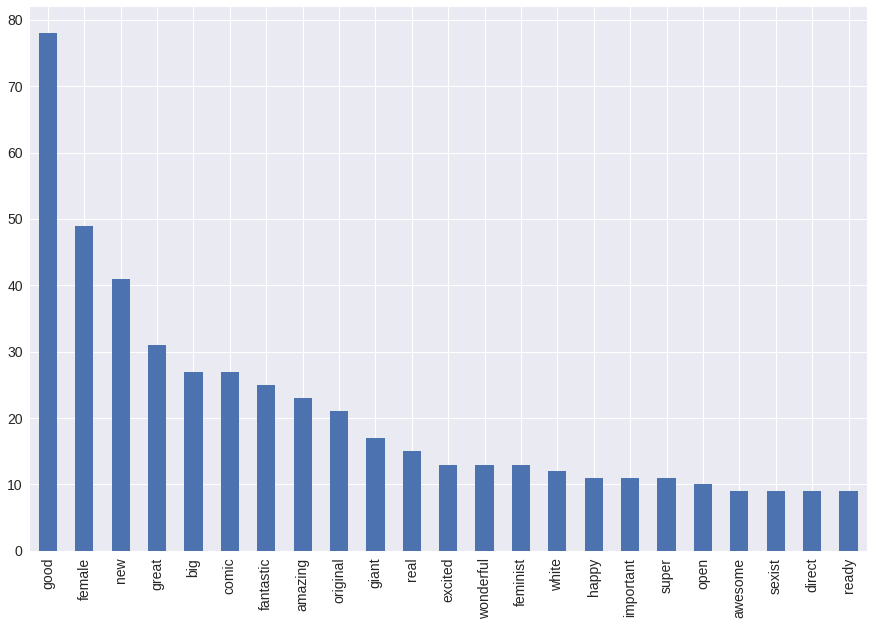

In [30]:
adj_words = pd.Series(adj_words)
adj_words.value_counts()[adj_words.value_counts() > 8].plot(kind = 'bar', figsize = (15, 10))
ax = plt.subplot()

for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)

plt.show()

## Wordcloud of tweet adjectives

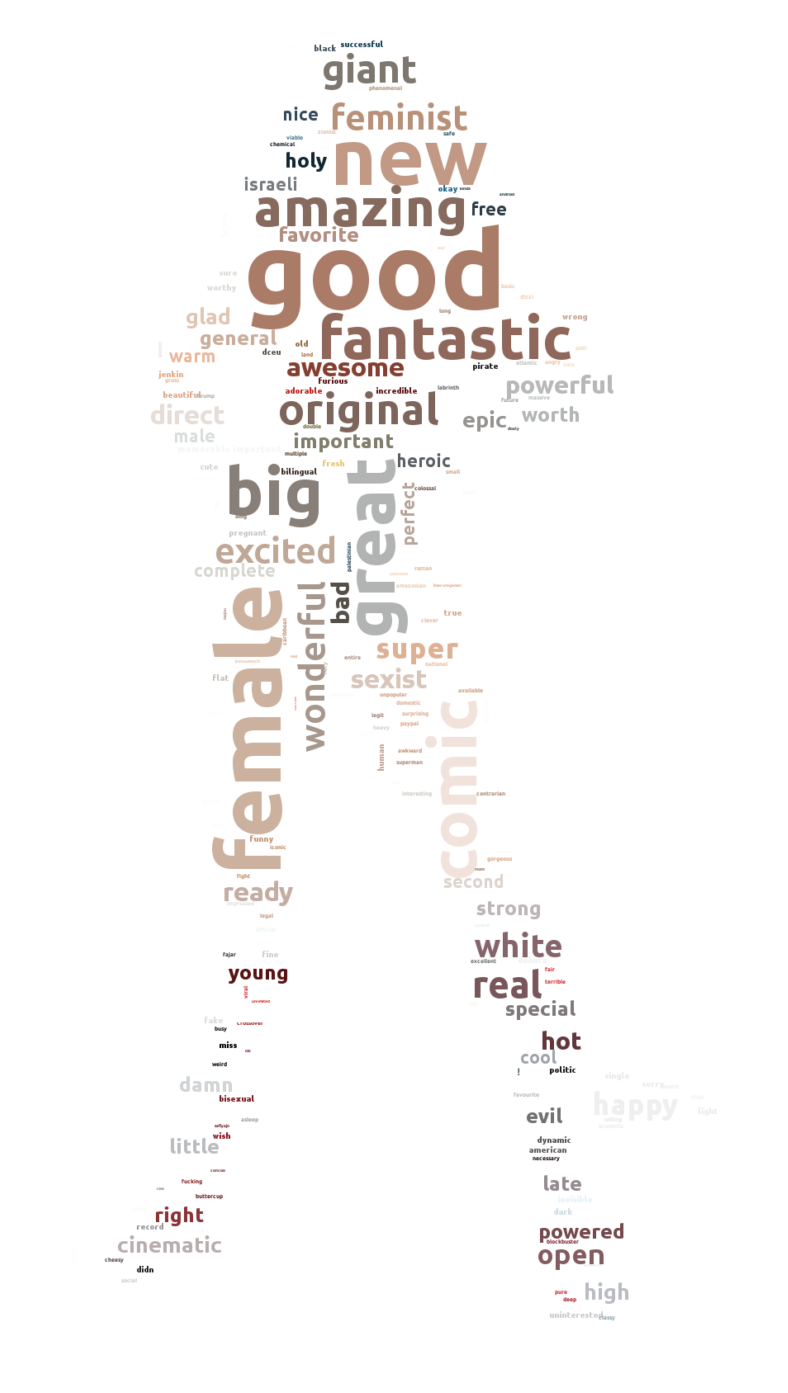

In [31]:
from scipy.misc import imread
from PIL import Image

font = '/usr/share/fonts/truetype/ubuntu-font-family/Ubuntu-B.ttf'
ww_img = imread("./wonder_woman2.jpg")
coloring = np.array(Image.open("./wonder_woman2.jpg"))
image_colors = ImageColorGenerator(coloring)
    
wc = WordCloud(font_path = font, mask= ww_img, max_font_size=80, min_font_size=2, 
                width=1800, height=2000, background_color = "white", 
                stopwords = STOPWORDS, max_words=200, scale = 2.5)

wc.generate(' '.join(adj_words))
plt.figure(figsize = (25, 25))
plt.imshow(wc.recolor(color_func = image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

## Word vectors

In [32]:
w2vec = gensim.models.Word2Vec(bigram_phrases)

In [33]:
w2vec.most_similar(positive=['heroic'], topn=3)

[('wait', 0.33177679777145386),
 ('complete', 0.2818560004234314),
 ('definitely', 0.26623570919036865)]